In [1]:
import qiskit
from qiskit_aer import AerSimulator

In [2]:
secretnumber = "010"
n=3

In [3]:
def get_circ(n):
    U = qiskit.QuantumCircuit(n+1,name="U")
    U.cx(1,3)

    circ = qiskit.QuantumCircuit(n+1,n)
    for i in range(n+1):
        if i==n:
            circ.x(i)
        circ.h(i)
    circ.append(U,range(n+1)) 
    circ.h([0,1,2])
    circ.measure([0,1,2],[0,1,2])
    return circ,U

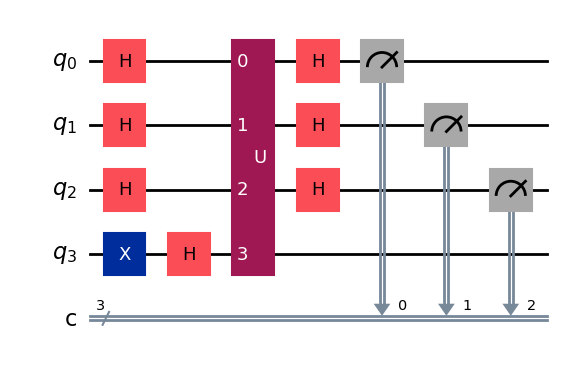

In [4]:
circ,U = get_circ(3)

circ.draw('mpl')

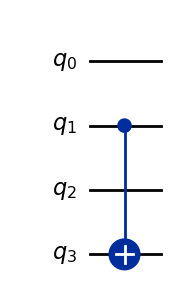

In [5]:
U.draw('mpl') 

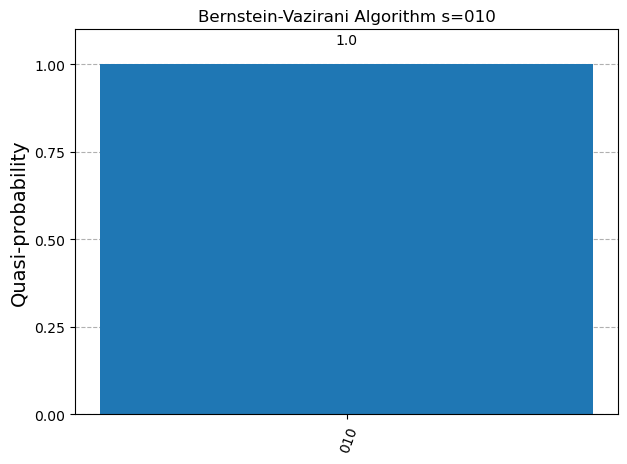

In [6]:
simulator = AerSimulator()
circ = qiskit.transpile(circ, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
qiskit.visualization.plot_distribution(counts, title=f"Bernstein-Vazirani Algorithm s={secretnumber}")